# RSA
**Fuente:** Matematicas discretas y sus aplicaciones - Rosen - Quinta Edición - pag 151,175,176

## Criptologia

Se define como el estudio de los mensajes secretos, es decir, el estudio de los métodos, practicas, teorías, etc, para `encriptar`,`codificar` un mensaje a enviar. De la misma forma para `descencriptar`, `decodificar` un mensaje para leerlo. La codificacion se usa para transmitir un mensaje de manera segura y que a terceros le sea imposible leer.

Muchos de los algoritmos usados en criptologia usan álgebra modular, debido a que varios metodos de encriptacion se pueden representar matemáticamente mediante el uso del modulo. Por ejemplo el `Cifrado Cesar`, el cual consiste en mover cada letra del alfabeto tres posiciones hacia delante. Por ejemplo el mensaje `hola` encriptado con el algoritmo de Cesar se transforma en `krñd`, este código se podría representar matemáticamente como $(p+3)mod\ 27$, donde 27 es el numero de caracteres del alfabeto.

In [1]:
Alfabeto = ("a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "ñ", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y" ,"z")

In [2]:
def cifrado_cesar(palabra):
    mot = palabra.lower()
    crypto = ""
    for char in mot:
        p = Alfabeto.index(char)
        crypto += Alfabeto[(p + 3)%len(Alfabeto)]
    return crypto

def descifrado_cesar(crypto):
    palabra = ""
    for char in crypto:
        p = Alfabeto.index(char)
        palabra += Alfabeto[(p - 3)%len(Alfabeto)]
    return palabra

In [4]:
palabra = "perro"
crypto = cifrado_cesar(palabra)
descrypto = descifrado_cesar(crypto)
print("La palabra a encriptar es: ",palabra,"\nLa palabra encriptada es: ",crypto,"\nLa palabra descencriptada es:", descrypto)

La palabra a encriptar es:  perro 
La palabra encriptada es:  shuur 
La palabra descencriptada es: perro


Existen muchas maneras de codificar los mensajes y entre mas complejo sea el algoritmo, mas segura es la encriptacion. El cifrado de cesar no tiene un nivel de seguridad muy alto, pero podria mejorarse moviendo cada letras $k$ veces o multiplicando $p$ por algun escalar.

$$(ap + k)mod\ 27$$

## Criptosistema de clave publica

En el metodo anterior se tenia una clave con la cual era posible encriptar o descencriptar el mensaje, lo que se denomina una clave publica, este concepto hace inseguro la codificacion, debido a que cualquier persona con la clave seria capas de leer el mensaje, aunque es dificil obtener la clave, no es imposible. Los criptosistemas de clave publica, conisten en el uso de dos claves una publica y otra privada, una para encriptar y otra para descencriptar. El obtener dichas claves se hace de una manera que no se repitan dos pares de clave tan facilmente.

En 1976 `Ronald Rivest`, `Adi Shamir` y `Leonard Adleman`, crearon un criptosistema de clave publica conocido como sistema RSA, RSA usa la exponenciacion modular y el producto de primos grandes. El metodo consiste en tener dos claves una para encriptar y otra para desencriptar el mensaje, $(e,n)$ y $(d,n)$ respectivamente.

El algoritmo de RSA se puede describir de la siguiente manera.
$$M = m^e mod\ n$$ $$m = M^d mod \ n$$
donde $M$ es el mensaje cifrado, $m$ el mensaje a transmitir, $e$ la clave publica, $d$ la clave privada y $n$ el producto de dos numeros primos.

El Algoritmo de RSA se resume en los siguientes pasos:
* Para Encriptar el mensaje
    1. Seleccionar dos numeros primos $p$ y $q$ utilizando algun test de primalidad.
    2. Hallar $n = pq$
    3. Hallar $\phi(n) = (p-1)(q-1)$ donde $\phi$ es la funcion de euler.
    4. Elegir aleatoriamente un numero $e$ entre 1 y $\phi(n)$ tal que mcd(e, $\phi(n)$) = 1,un $e$ calculado con una `Suma Encadenada` corta es mas seguro.
    5. use $M = m^emod\ n$, $m$ es un numero, si desea encriptar texto se realiza una transformacion de letra a numero como la del `Algoritmo de Cesar`


* Para Desencritar el mensaje
    1. Calcular $d$ de tal manera que sea el inverso de $e\ mod\ \phi(n)$, d se puede calcular usando el `Algoritmo de Euclides Extendido`.

**Nota:** Algortimo de Euclides se usa para calcular el maximo comun divisor de dos numeros $mcd(a,b)$<br>
**Nota 2:** Debe cumplirse que m < n, de lo contrario no se podra desencriptar el mensaje

In [49]:
import random

def RSA_cod(n, e, m):
    M = (m**e)%n
    return M

def RSA_descod(n, d, M):
    m = (M**d)%n
    return m

def mcd(a, b):
    if b == 0:
        return a
    return mcd(b, a % b)

def calcular_e(n,ϕ):
    aux = [i for i in range(int(n)) if mcd(i,ϕ) == 1]
    e = aux[random.randrange(len(aux))]
    return e

def calcular_n_phi(p,q):
    n = p*q
    ϕ = (p-1)*(q-1)
    return n, ϕ

def calcular_d(a, b):
    if b == 0:
        return (a,1,0)
    else:
        d, s, t = calcular_d(b,a%b)
        return d, t, s-(a//b)*t

def normalizar_d(d,ϕ):
    if (d < 0 or d > ϕ):
        d = d % ϕ
    return d

In [50]:
p = 59
q = 61
n, ϕ =  calcular_n_phi(p,q)
e = calcular_e(n,ϕ)
d = calcular_d(e,ϕ)
d = normalizar_d(d[1],ϕ)

In [51]:
men = 934
M = RSA_cod(n, e, men)
print(n, e, men, M)

3599 239 934 1326


In [52]:
m = RSA_descod(n, d, M)
print(n, d, M, m)

3599 2519 1326 934


Si se quiere codificar texto se recomienda asiganr un numero a cada letra, por ejemplo su posicion en el alfabeto y hacer grupos de dos letras. por ejemplo.
<br> <center>hola $\rightarrow$ h o l a $\rightarrow$ 07 15 11 00 $\rightarrow$ 0715 1100 </center>
Los numeros 0715 y 1100 serian los que se encripten con RSA

In [54]:
def str_to_arrayInt(m):
    vec_aux = []
    men = m.lower()
    for i in men:
        if Alfabeto.index(i)<10:
            vec_aux.append("0"+str(Alfabeto.index(i)))
        else:
            vec_aux.append(str(Alfabeto.index(i)))
    str_men = [vec_aux[i]+vec_aux[i+1] for i in range(0,len(vec_aux),2)]
    return [int(i) for i in str_men]

In [56]:
men = "Hola"
int_men = str_to_arrayInt(men)
int_men

[715, 1100]

In [57]:
M = [RSA_cod(n, e, i) for i in int_men]
print("Mensaje a enviar: ",M)

Mensaje a enviar:  [2971, 1922]


In [58]:
m = [RSA_descod(n, d, i) for i in M]
print("Mensaje desencriptado: ",m)

Mensaje desencriptado:  [715, 1100]


Hoy en dia la multimedia se a tomado gran parte de internet, tambien se podria aplicar RSA a imagenes.

(1287, 1020)


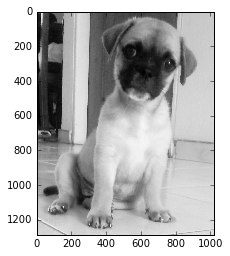

In [59]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = io.imread("../imagenes/kiara.jpg")
gimg = np.mean(img,axis=2)

print(gimg.shape)

plt.imshow(gimg, cmap = plt.cm.Greys_r)

In [72]:
p = 11
q = 23
n, ϕ =  calcular_n_phi(p,q)
e = calcular_e(n,ϕ)
d = calcular_d(e,ϕ)
d = normalizar_d(d[1],ϕ)
print(n, e, d)

253 29 129


In [111]:
img_cod = []
for i in range(gimg.shape[0]):
    for j in range(gimg.shape[1]):
        img_cod.append(RSA_cod(n, e, int(gimg[i][j])))

In [114]:
crypto = np.array(img_cod)
crypto.reshape(1287,1020)

array([[218, 157, 142, ...,   6,   6,   6],
       [  5, 123, 138, ...,   6,   6,  15],
       [ 42, 246, 219, ...,   6,  15, 113],
       ..., 
       [ 58,  58,  58, ..., 213, 213, 213],
       [ 58, 119, 119, ..., 245, 245, 245],
       [119, 244, 244, ...,  79,  79,  79]])

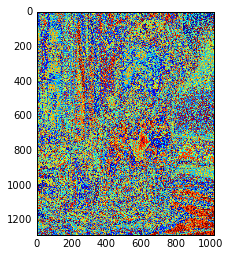

In [116]:
plt.imshow(crypto.reshape(1287,1020))

In [119]:
img_descod = []
for i in img_cod:
    img_descod.append(RSA_descod(n , d, i))

In [120]:
descrypto = np.array(img_descod)
descrypto.reshape(1287,1020)

array([[ 38,  37,  32, ..., 156, 156, 156],
       [ 53,  50,  46, ..., 156, 156, 157],
       [ 60,  58,  54, ..., 156, 157, 158],
       ..., 
       [169, 169, 169, ..., 179, 179, 179],
       [169, 170, 170, ..., 180, 180, 180],
       [170, 171, 171, ..., 182, 182, 182]])

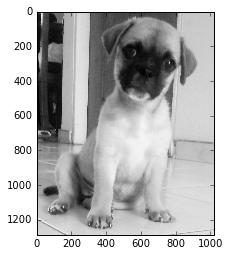

In [122]:
plt.imshow(descrypto.reshape(1287,1020), cmap = plt.cm.Greys_r)

¿Por que se trabajo con enteros y se realizo todo ese proceso antes de encriptar la imagen?

In [5]:
38**39

40884648475239771318296311608532703606388520015555810455191552

In [7]:
38.0**3

4.088464847523977e+61

In [8]:
38.0**39 == 38**39

False

Debido a que se manejan numeros muy grandes, y como se ve en el ejemplo, los resultados entre enteros y flotantes cambian. Se decide trabajar con enteros pues el algoritmo RSA esta pensado para enteros y no para flotantes, por ende se vuelven enteros los pixeles de la imagen y se procesan, aunque esto representa una perdida de informacion si no se realiza el Algoritmo RSA no funciona. Una vez obtenida la matriz de enteros se procede a realizar la encriptacion.